## Proyecto: tiendas, productos y ventas

En este proyecto se obtienen tres datasets de productos, tiendas y ventas relacionados entre sí en el cual intentaremos discernir la relación entre estos datasets y los insights valiosos que se puedan obtener a raíz del análisis exploratorio de sus datos. El principal objetivo de este análisis será centrarnos en la variación de las unidades vendidas por producto en función del resto de características que lo acompañan.

In [223]:
# importación de librerías necesarias en el análisis exploratorio

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Productos

In [224]:
data_productos = pd.read_csv("/workspaces/Junior-Data-Scientist---Prueba-t-cnica/data/raw/productos.csv")
data_productos

,product_id,product_name,category,price,cost,launch_date,status
0,101,Cafetera Premium,Electrodomesticos,90,60.0,2023-01-01,active
1,102,Cafetera Básica,Electrodomesticos,60,40.0,2023-01-15,active
2,103,Tostadora 2 rebanadas,Electrodomesticos,30,20.0,2022-11-01,active
3,104,Tostadora 4 rebanadas,Electrodomesticos,50,30.0,2022-12-01,paused
4,105,Batidora Compacta,Electrodomesticos,80,NaN,2023-02-01,active
5,106,Lavadora 7kg,Electrodomesticos,300,200.0,2022-05-01,discontinued
6,107,Tableta 8 pulgadas,Electrónica,120,95.0,2023-03-10,active
7,108,Smartphone Gama Media,Electrónica,250,180.0,2023-03-15,active
8,109,Smartphone Gama Alta,Electrónica,500,380.0,2023-03-20,active
9,110,Laptop Básica,Electrónica,450,350.0,2023-01-05,paused


In [225]:
data_productos.shape

(21, 7)

In [226]:
data_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    21 non-null     int64  
 1   product_name  21 non-null     object 
 2   category      21 non-null     object 
 3   price         21 non-null     int64  
 4   cost          20 non-null     float64
 5   launch_date   21 non-null     object 
 6   status        21 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.3+ KB


In [227]:
# Identificar celdas vacías o nulas
vacias = data_productos.applymap(lambda x: pd.isna(x) or x == " ")

# Filtrar filas donde alguna columna tenga valores vacíos o nulos
na_o_vacias = data_productos[vacias.any(axis=1)]

na_o_vacias

/tmp/ipykernel_550/3513796456.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vacias = data_productos.applymap(lambda x: pd.isna(x) or x == " ")


,product_id,product_name,category,price,cost,launch_date,status
4,105,Batidora Compacta,Electrodomesticos,80,NaN,2023-02-01,active


Un único valor nulo en la variable "cost". Se trata del producto "batidora compacta". Debido a la necesidad de conservar la mayor cantidad de datos posibles se imputará ese valor nulo por la media de todos los productos pertenecientes a su misma categoría.

In [228]:
filas_electrodomésticos = data_productos.loc[data_productos["category"] == "Electrodomesticos"]
filas_electrodomésticos

,product_id,product_name,category,price,cost,launch_date,status
0,101,Cafetera Premium,Electrodomesticos,90,60.0,2023-01-01,active
1,102,Cafetera Básica,Electrodomesticos,60,40.0,2023-01-15,active
2,103,Tostadora 2 rebanadas,Electrodomesticos,30,20.0,2022-11-01,active
3,104,Tostadora 4 rebanadas,Electrodomesticos,50,30.0,2022-12-01,paused
4,105,Batidora Compacta,Electrodomesticos,80,NaN,2023-02-01,active
5,106,Lavadora 7kg,Electrodomesticos,300,200.0,2022-05-01,discontinued
15,116,Aspiradora Robot,Electrodomesticos,250,180.0,2022-10-01,active
18,118,Parrilla Eléctrica,Electrodomesticos,100,70.0,2023-02-15,active
19,119,Ventilador de Pie,Electrodomesticos,35,25.0,2023-02-20,active
20,120,Plancha de Ropa,Electrodomesticos,45,30.0,2023-03-01,active


In [229]:
media_cost_productos =filas_electrodomésticos["cost"].mean().round(2)
media_cost_productos

72.78

In [230]:
data_productos["cost"].fillna(media_cost_productos, inplace=True)
data_productos

/tmp/ipykernel_550/3670864960.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_productos["cost"].fillna(media_cost_productos, inplace=True)


,product_id,product_name,category,price,cost,launch_date,status
0,101,Cafetera Premium,Electrodomesticos,90,60.00,2023-01-01,active
1,102,Cafetera Básica,Electrodomesticos,60,40.00,2023-01-15,active
2,103,Tostadora 2 rebanadas,Electrodomesticos,30,20.00,2022-11-01,active
3,104,Tostadora 4 rebanadas,Electrodomesticos,50,30.00,2022-12-01,paused
4,105,Batidora Compacta,Electrodomesticos,80,72.78,2023-02-01,active
5,106,Lavadora 7kg,Electrodomesticos,300,200.00,2022-05-01,discontinued
6,107,Tableta 8 pulgadas,Electrónica,120,95.00,2023-03-10,active
7,108,Smartphone Gama Media,Electrónica,250,180.00,2023-03-15,active
8,109,Smartphone Gama Alta,Electrónica,500,380.00,2023-03-20,active
9,110,Laptop Básica,Electrónica,450,350.00,2023-01-05,paused


In [231]:
#se eliminan duplicados

data_productos = data_productos.drop_duplicates()
data_productos

,product_id,product_name,category,price,cost,launch_date,status
0,101,Cafetera Premium,Electrodomesticos,90,60.00,2023-01-01,active
1,102,Cafetera Básica,Electrodomesticos,60,40.00,2023-01-15,active
2,103,Tostadora 2 rebanadas,Electrodomesticos,30,20.00,2022-11-01,active
3,104,Tostadora 4 rebanadas,Electrodomesticos,50,30.00,2022-12-01,paused
4,105,Batidora Compacta,Electrodomesticos,80,72.78,2023-02-01,active
5,106,Lavadora 7kg,Electrodomesticos,300,200.00,2022-05-01,discontinued
6,107,Tableta 8 pulgadas,Electrónica,120,95.00,2023-03-10,active
7,108,Smartphone Gama Media,Electrónica,250,180.00,2023-03-15,active
8,109,Smartphone Gama Alta,Electrónica,500,380.00,2023-03-20,active
9,110,Laptop Básica,Electrónica,450,350.00,2023-01-05,paused


Dataset limpio

# Tiendas

In [232]:
data_tiendas = pd.read_csv("/workspaces/Junior-Data-Scientist---Prueba-t-cnica/data/raw/tiendas.csv")
data_tiendas

,store_id,store_name,location,manager,opening_date
0,501,Tienda Centro,Madrid,Juan Perez,2022-01-10
1,502,Tienda Norte,Barcelona,Laura Lopez,2022-02-05
2,503,Tienda Sur,Sevilla,Carlos Ramirez,2022-03-01
3,504,Tienda Este,Valencia,Ana Gomez,2022-04-15
4,505,Tienda Oeste,Bilbao,Pedro Hernandez,2022-05-01
5,506,Tienda Duplicada,Madrid,Julian Casas,2022-05-20
6,507,Tienda Móvil,Itinerante,Maria Diaz,2022-06-10
7,508,Pop-up Store,Barcelona,-,2023-01-01
8,509,Tienda Online,Online,Virtual Manager,2022-07-01
9,509,Tienda Online Duplicada,Online,Virtual Manager,2022-07-01


In [233]:
data_tiendas.shape

(10, 5)

In [234]:
data_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   store_id      10 non-null     int64 
 1   store_name    10 non-null     object
 2   location      10 non-null     object
 3   manager       10 non-null     object
 4   opening_date  10 non-null     object
dtypes: int64(1), object(4)
memory usage: 528.0+ bytes


In [235]:
# Identificar celdas vacías o nulas
vacias = data_tiendas.applymap(lambda x: pd.isna(x) or x == " ")

# Filtrar filas donde alguna columna tenga valores vacíos o nulos
na_o_vacias = data_tiendas[vacias.any(axis=1)]

na_o_vacias

/tmp/ipykernel_550/121326519.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vacias = data_tiendas.applymap(lambda x: pd.isna(x) or x == " ")


,store_id,store_name,location,manager,opening_date


In [236]:
data_tiendas.drop_duplicates()
data_tiendas.shape

(10, 5)

Sin datos nulos ni duplicados, dataset limpio.

# Ventas

In [237]:
data_ventas = pd.read_csv("/workspaces/Junior-Data-Scientist---Prueba-t-cnica/data/raw/ventas.csv")
data_ventas

,sale_id,date,store_id,product_id,units_sold,total_revenue,total_cost
0,10001,2023-01-02,501,101,5,450,300
1,10002,2023-01-03,501,102,3,180,120
2,10003,2023-01-03,501,105,1,80,NaN
3,10004,2023-01-15,502,103,2,60,40
4,10005,2023-02-10,502,104,1,50,30
5,10006,2023-02-11,502,106,1,300,200
6,10007,2023-02-15,503,107,2,240,190
7,10008,2023-02-16,503,108,1,250,180
8,10009,2023-02-20,504,109,1,500,380
9,10010,2023-03-01,501,110,2,900,700


In [238]:
data_ventas.shape

(33, 7)

In [239]:
data_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sale_id        33 non-null     int64 
 1   date           33 non-null     object
 2   store_id       33 non-null     int64 
 3   product_id     33 non-null     int64 
 4   units_sold     33 non-null     int64 
 5   total_revenue  33 non-null     int64 
 6   total_cost     32 non-null     object
dtypes: int64(5), object(2)
memory usage: 1.9+ KB


In [240]:
# Identificar celdas vacías o nulas
vacias = data_ventas.applymap(lambda x: pd.isna(x) or x == " ")

# Filtrar filas donde alguna columna tenga valores vacíos o nulos
na_o_vacias = data_ventas[vacias.any(axis=1)]

na_o_vacias

/tmp/ipykernel_550/3326494208.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vacias = data_ventas.applymap(lambda x: pd.isna(x) or x == " ")


,sale_id,date,store_id,product_id,units_sold,total_revenue,total_cost
2,10003,2023-01-03,501,105,1,80,NaN
10,10011,2023-03-05,506,105,2,160,
11,10012,2023-03-05,506,117,5,200,


Se observa que los datos nulos/faltantes corresponden al producto con valor nulo tratado en el dataset "data_productos" y a la fila duplicada del mismo dataset, que por motivos de extracción errónea se han rellenado con valor faltante.

Estos valores se imputarán por el producto del coste y la cantidad de unidades vendidas totales.

In [241]:
producto_valor_faltante = data_productos[data_productos["product_id"] == 117]
coste_producto_valor_faltante  = producto_valor_faltante["cost"]
coste_producto_valor_faltante

16    25.0
Name: cost, dtype: float64

In [242]:
data_ventas.loc[data_ventas["sale_id"] == 10012, "total_cost"] = 25
data_ventas.loc[data_ventas["sale_id"] == 10003, "total_cost"] = media_cost_productos 
data_ventas.loc[data_ventas["sale_id"] == 10011, "total_cost"] = media_cost_productos * 2

data_ventas


,sale_id,date,store_id,product_id,units_sold,total_revenue,total_cost
0,10001,2023-01-02,501,101,5,450,300
1,10002,2023-01-03,501,102,3,180,120
2,10003,2023-01-03,501,105,1,80,72.78
3,10004,2023-01-15,502,103,2,60,40
4,10005,2023-02-10,502,104,1,50,30
5,10006,2023-02-11,502,106,1,300,200
6,10007,2023-02-15,503,107,2,240,190
7,10008,2023-02-16,503,108,1,250,180
8,10009,2023-02-20,504,109,1,500,380
9,10010,2023-03-01,501,110,2,900,700


In [243]:
data_ventas.drop_duplicates()
data_ventas.shape

(33, 7)

Dataset limpio.

## Construcción del dataset final

In [244]:
dataset_tiendas_ventas = pd.merge(data_ventas, data_tiendas, on= "store_id")
dataset_tiendas_ventas

,sale_id,date,store_id,product_id,units_sold,total_revenue,total_cost,store_name,location,manager,opening_date
0,10001,2023-01-02,501,101,5,450,300,Tienda Centro,Madrid,Juan Perez,2022-01-10
1,10002,2023-01-03,501,102,3,180,120,Tienda Centro,Madrid,Juan Perez,2022-01-10
2,10003,2023-01-03,501,105,1,80,72.78,Tienda Centro,Madrid,Juan Perez,2022-01-10
3,10004,2023-01-15,502,103,2,60,40,Tienda Norte,Barcelona,Laura Lopez,2022-02-05
4,10005,2023-02-10,502,104,1,50,30,Tienda Norte,Barcelona,Laura Lopez,2022-02-05
5,10006,2023-02-11,502,106,1,300,200,Tienda Norte,Barcelona,Laura Lopez,2022-02-05
6,10007,2023-02-15,503,107,2,240,190,Tienda Sur,Sevilla,Carlos Ramirez,2022-03-01
7,10008,2023-02-16,503,108,1,250,180,Tienda Sur,Sevilla,Carlos Ramirez,2022-03-01
8,10009,2023-02-20,504,109,1,500,380,Tienda Este,Valencia,Ana Gomez,2022-04-15
9,10010,2023-03-01,501,110,2,900,700,Tienda Centro,Madrid,Juan Perez,2022-01-10


In [245]:
dataset_tiendas_ventas_productos = pd.merge(dataset_tiendas_ventas, data_productos, on= "product_id")
dataset_tiendas_ventas_productos

,sale_id,date,store_id,product_id,units_sold,total_revenue,total_cost,store_name,location,manager,opening_date,product_name,category,price,cost,launch_date,status
0,10001,2023-01-02,501,101,5,450,300,Tienda Centro,Madrid,Juan Perez,2022-01-10,Cafetera Premium,Electrodomesticos,90,60.00,2023-01-01,active
1,10002,2023-01-03,501,102,3,180,120,Tienda Centro,Madrid,Juan Perez,2022-01-10,Cafetera Básica,Electrodomesticos,60,40.00,2023-01-15,active
2,10003,2023-01-03,501,105,1,80,72.78,Tienda Centro,Madrid,Juan Perez,2022-01-10,Batidora Compacta,Electrodomesticos,80,72.78,2023-02-01,active
3,10004,2023-01-15,502,103,2,60,40,Tienda Norte,Barcelona,Laura Lopez,2022-02-05,Tostadora 2 rebanadas,Electrodomesticos,30,20.00,2022-11-01,active
4,10005,2023-02-10,502,104,1,50,30,Tienda Norte,Barcelona,Laura Lopez,2022-02-05,Tostadora 4 rebanadas,Electrodomesticos,50,30.00,2022-12-01,paused
5,10006,2023-02-11,502,106,1,300,200,Tienda Norte,Barcelona,Laura Lopez,2022-02-05,Lavadora 7kg,Electrodomesticos,300,200.00,2022-05-01,discontinued
6,10007,2023-02-15,503,107,2,240,190,Tienda Sur,Sevilla,Carlos Ramirez,2022-03-01,Tableta 8 pulgadas,Electrónica,120,95.00,2023-03-10,active
7,10008,2023-02-16,503,108,1,250,180,Tienda Sur,Sevilla,Carlos Ramirez,2022-03-01,Smartphone Gama Media,Electrónica,250,180.00,2023-03-15,active
8,10009,2023-02-20,504,109,1,500,380,Tienda Este,Valencia,Ana Gomez,2022-04-15,Smartphone Gama Alta,Electrónica,500,380.00,2023-03-20,active
9,10010,2023-03-01,501,110,2,900,700,Tienda Centro,Madrid,Juan Perez,2022-01-10,Laptop Básica,Electrónica,450,350.00,2023-01-05,paused


In [246]:
#tamaño dataset final

dataset_tiendas_ventas_productos.shape

(32, 17)

In [247]:
#info dataset final

dataset_tiendas_ventas_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sale_id        32 non-null     int64  
 1   date           32 non-null     object 
 2   store_id       32 non-null     int64  
 3   product_id     32 non-null     int64  
 4   units_sold     32 non-null     int64  
 5   total_revenue  32 non-null     int64  
 6   total_cost     32 non-null     object 
 7   store_name     32 non-null     object 
 8   location       32 non-null     object 
 9   manager        32 non-null     object 
 10  opening_date   32 non-null     object 
 11  product_name   32 non-null     object 
 12  category       32 non-null     object 
 13  price          32 non-null     int64  
 14  cost           32 non-null     float64
 15  launch_date    32 non-null     object 
 16  status         32 non-null     object 
dtypes: float64(1), int64(6), object(10)
memory usage: 4.4+ K

Se han eliminado filas ya que el "product_id = 999" no aparece en el dataset "data_productos". Se prescindirá de ese producto ya que no tenemos datos relevantes como su categoría o el nombre del mismo como para poder incluirlo en el estudio. 

Se observa también que el producto "Laptop Profesional" no aparece en el dataset final, ya que ninguna unidad ha sido vendida.

Además en el dataset "data_ventas" se observa un "store_id" con un valor "999". Debido a que no hay ninguna equivalencia en el dataset "data_tiendas", tampoco aparece en este dataset final.

Por último se convertirá la variable "total_cost" a int64 debido a la naturaleza de sus datos para poder tratar a la variable como numérica.

In [248]:
#conversión de variable categórica a numérica

dataset_tiendas_ventas_productos["total_cost"] = pd.to_numeric(dataset_tiendas_ventas_productos["total_cost"])

In [249]:
#nuevo nombre del dataset final

dataset = dataset_tiendas_ventas_productos.copy()

In [250]:
#renombramos la fecha de venta del producto por una más descriptiva

dataset.rename(columns = {"date": "sale_date"}, inplace=True)

In [251]:
#columnas que se eliminan por no aportar valor al análisis

dataset.drop(columns= ['sale_id', 'store_id', 'product_id', 'manager', 'status'], inplace=True)

In [252]:
#reorganización personal de columnas

dataset = dataset [['product_name', 'category', 'price', 'cost', 'units_sold', 'total_revenue', 
                            'total_cost', 'launch_date', 'sale_date', 'store_name', 'location', 'opening_date']]

In [253]:
dataset.describe()

,price,cost,units_sold,total_revenue,total_cost
count,32.000000,32.000000,32.000000,32.00000,32.000000
mean,153.125000,112.705000,2.593750,295.78125,213.010625
std,180.379305,136.805668,1.864081,307.93304,237.110550
min,15.000000,10.000000,1.000000,35.00000,25.000000
25%,40.000000,25.000000,1.000000,78.75000,54.000000
50%,80.000000,60.000000,2.000000,190.00000,130.000000
75%,250.000000,180.000000,3.000000,412.50000,300.000000
max,800.000000,600.000000,10.000000,1350.00000,1050.000000


In [254]:
#guardado del dataset

dataset.to_csv("/workspaces/Junior-Data-Scientist---Prueba-t-cnica/data/processed/processed_data.csv", index=False)

In [255]:
#valores únicos por columna

for column in dataset:
    print(dataset[column].unique())


['Cafetera Premium' 'Cafetera Básica' 'Batidora Compacta'
 'Tostadora 2 rebanadas' 'Tostadora 4 rebanadas' 'Lavadora 7kg'
 'Tableta 8 pulgadas' 'Smartphone Gama Media' 'Smartphone Gama Alta'
 'Laptop Básica' 'Pack Cuchillos x3' 'Plancha de Ropa' 'Termo 1L'
 'Termo 500ml' 'Aspiradora Robot' 'Ventilador de Pie' 'Cámara Réflex'
 'Cámara Deportiva' 'Parrilla Eléctrica']
['Electrodomesticos' 'Electrónica' 'Hogar']
[ 90  60  80  30  50 300 120 250 500 450  40  45  25  15  35 800 200 100]
[ 60.    40.    72.78  20.    30.   200.    95.   180.   380.   350.
  25.    18.    10.   600.   150.    70.  ]
[ 5  3  1  2 10  4]
[ 450  180   80   60   50  300  240  250  500  900  160  200  850   90
   75   40   35  800  400 1350  135  105  360]
[ 300.    120.     72.78   40.     30.    200.    190.    180.    380.
  700.    145.56   25.    600.     60.     54.     50.   1050.    360.
   90.    140.     75.    240.  ]
['2023-01-01' '2023-01-15' '2023-02-01' '2022-11-01' '2022-12-01'
 '2022-05-01' '2023-

## <u>Análisis exploratorio</u>

- Análisis de variables:

'product_name': descripción del producto.
 
'category': categoría a la que pertenece el producto en concreto: 'Electrodomesticos', 'Electrónica' y 'Hogar'.

'price': precio de venta del producto.

'cost': coste de fabricación/venta del producto.

'units_sold': unidades totales vendidas del producto.

'total_revenue': beneficio total de la venta del producto teniendo en cuenta la cantidad vendida.

'total_cost': coste total del producto teniendo en cuenta la cantidad vendida.

'launch_date': fecha de puesta a la venta del producto.

'sale_date': fecha de la venta del producto.

'store_name': tienda en la que se vendió el producto.

'location': localización de la tienda donde se vendió el producto: 'Madrid', 'Barcelona', 'Sevilla', 'Valencia', 'Itinerante', 'Online' y 'Bilbao'.

'opening_date': fecha de apertura de la tienda donde se vendió el producto.



## Análisis univariante (categórico)

- variables categóricas: 'product_name', 'category', 'store_name', 'location'.

/tmp/ipykernel_550/3222265460.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axis[0, 0], x=top_10_productos.index, y=top_10_productos.values, palette="Blues_d")
/tmp/ipykernel_550/3222265460.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axis[1, 0], x=top_10_tiendas.index, y=top_10_tiendas.values, palette="Greens_d")


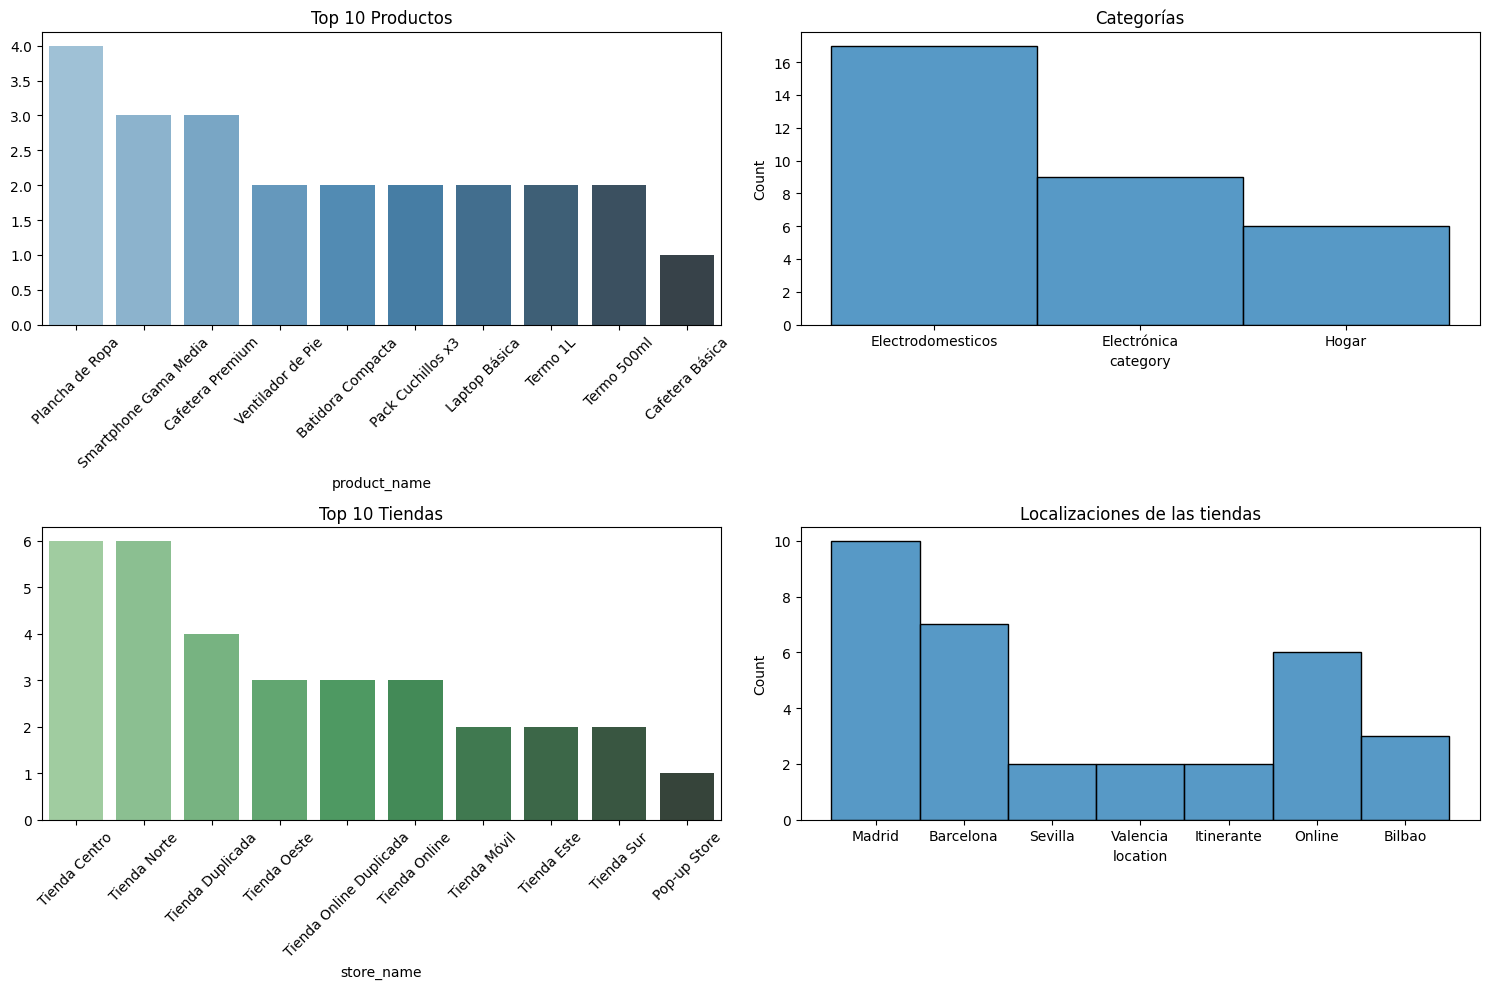

In [256]:
#agrupar y contar las categorías más frecuentes
top_10_productos = dataset['product_name'].value_counts().nlargest(10)  #top 10 productos
top_10_tiendas = dataset['store_name'].value_counts().nlargest(10)  #top 10 tiendas

#crear una figura y ejes
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

#histograma para los 10 productos más vendidos
sns.barplot(ax=axis[0, 0], x=top_10_productos.index, y=top_10_productos.values, palette="Blues_d")
axis[0, 0].set_title('Top 10 Productos')
axis[0, 0].tick_params(axis='x', rotation=45)

#histograma para las 10 tiendas más frecuentes
sns.barplot(ax=axis[1, 0], x=top_10_tiendas.index, y=top_10_tiendas.values, palette="Greens_d")
axis[1, 0].set_title('Top 10 Tiendas')
axis[1, 0].tick_params(axis='x', rotation=45)

#histograma para 'category' y 'location' (que deberían tener menos valores)
sns.histplot(ax=axis[0, 1], data=dataset, x="category").set_title('Categorías')
sns.histplot(ax=axis[1, 1], data=dataset, x="location").set_title('Localizaciones de las tiendas')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Productos: curiosamente el producto con mayor presencia en las diferentes tiendas es la plancha de ropa, por delante del smartphone de gama media.

Categorías: el tipo de producto que más se encuentra en las tiendas es el perteneciente a los electrodomésticos.

Tiendas: la Tienda Centro y la Tienda Norte lideran, teniendo cada uno 6 productos a la venta.

Localizaciones: Madrid lidera en cuanto a cantidad en número de tiendas. No obstante los resultados obtenidos están sesgados por la cantidad de ventas y no por el número total de tiendas.

## Análisis univariante (numérico)

- variables numéricas: 'price', 'cost', 'units_sold', 'total_revenue', 'total_cost'

##  - price

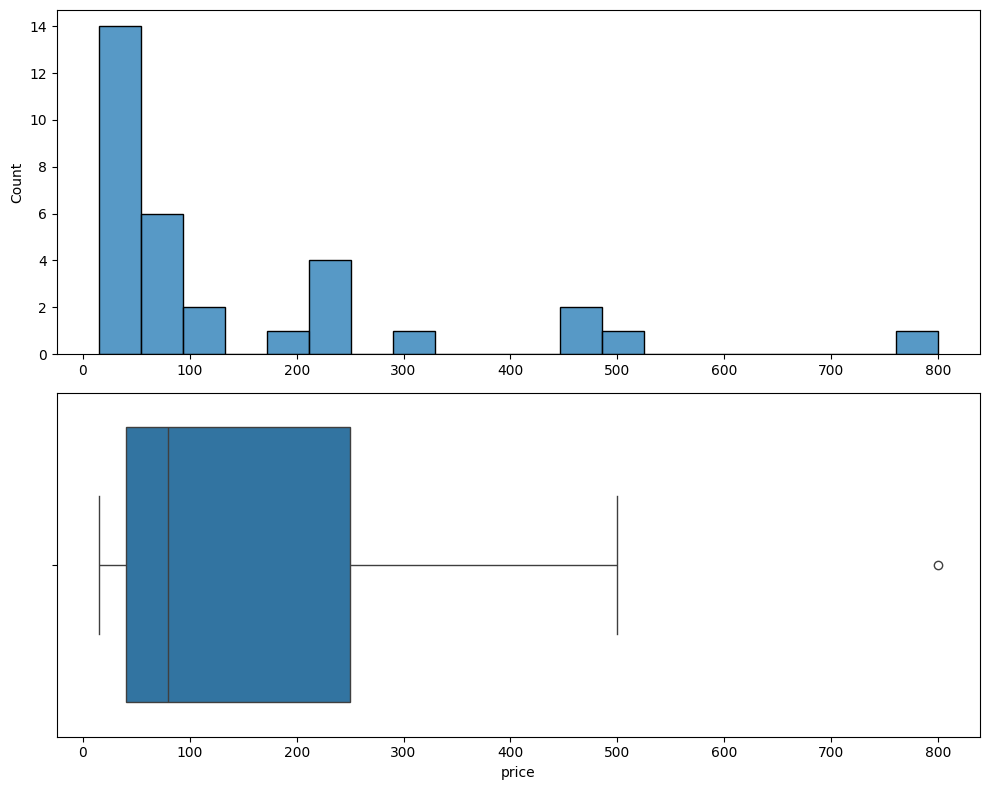

In [257]:
fig, axis = plt.subplots(2, 1, figsize=(10, 8))

# Histograma y boxplot para 'price'
sns.histplot(ax=axis[0], data=dataset, x="price", bins=20).set(xlabel=None)
sns.boxplot(ax=axis[1], data=dataset, x="price")

plt.tight_layout()


Se observa una concentración mayoritaría de los precios de los productos por debajo de los 100 €, muy posiblemente debido a que la mayoría de los productos son de la categoría "electrodomésticos".

<Axes: xlabel='cost'>

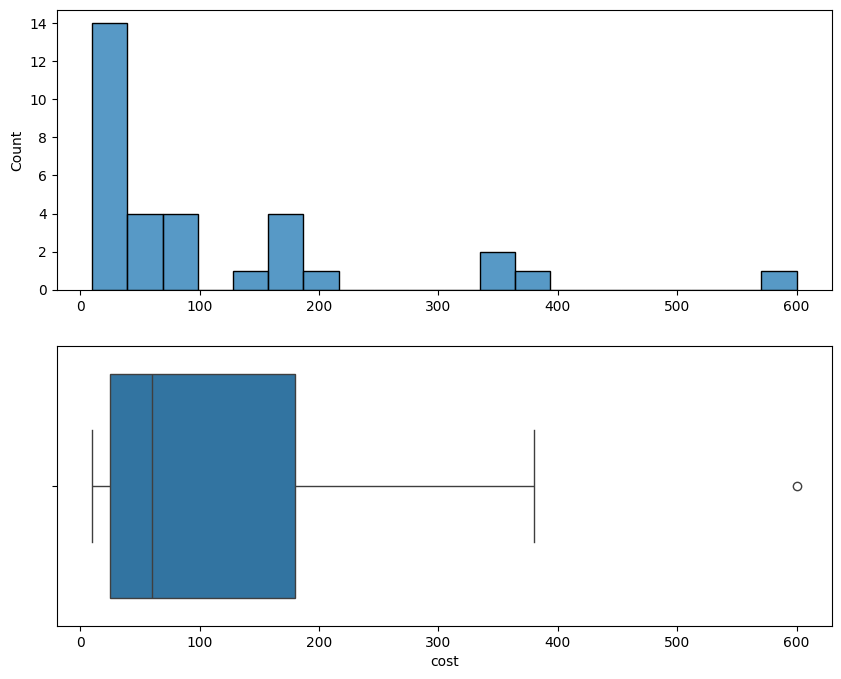

In [258]:
fig, axis = plt.subplots(2, 1, figsize=(10, 8))

# Histograma y boxplot para 'price'
sns.histplot(ax=axis[0], data=dataset, x="cost", bins=20).set(xlabel=None)
sns.boxplot(ax=axis[1], data=dataset, x="cost")

comentario costes

<Axes: xlabel='units_sold'>

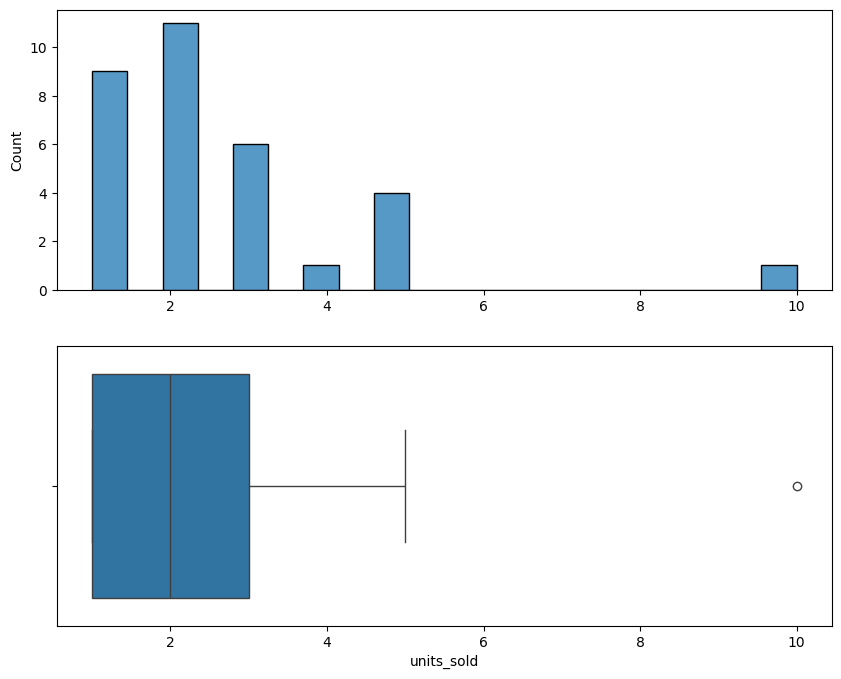

In [259]:
fig, axis = plt.subplots(2, 1, figsize=(10, 8))

# Histograma y boxplot para 'price'
sns.histplot(ax=axis[0], data=dataset, x="units_sold", bins=20).set(xlabel=None)
sns.boxplot(ax=axis[1], data=dataset, x="units_sold")

un solo producto con 10 unidades vendidas

<Axes: xlabel='total_revenue'>

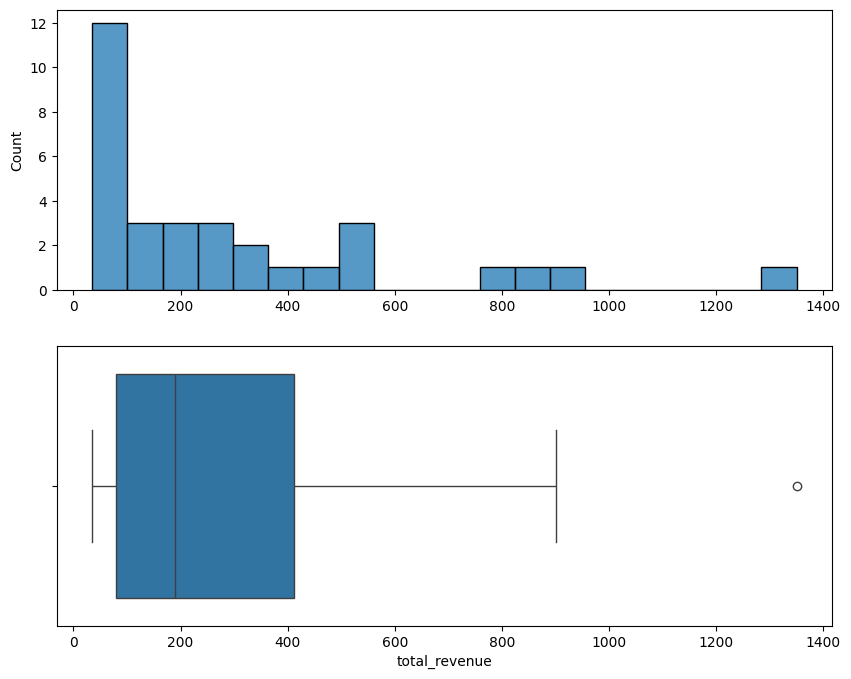

In [260]:
fig, axis = plt.subplots(2, 1, figsize=(10, 8))

# Histograma y boxplot para 'price'
sns.histplot(ax=axis[0], data=dataset, x="total_revenue", bins=20).set(xlabel=None)
sns.boxplot(ax=axis[1], data=dataset, x="total_revenue")

<Axes: xlabel='total_cost'>

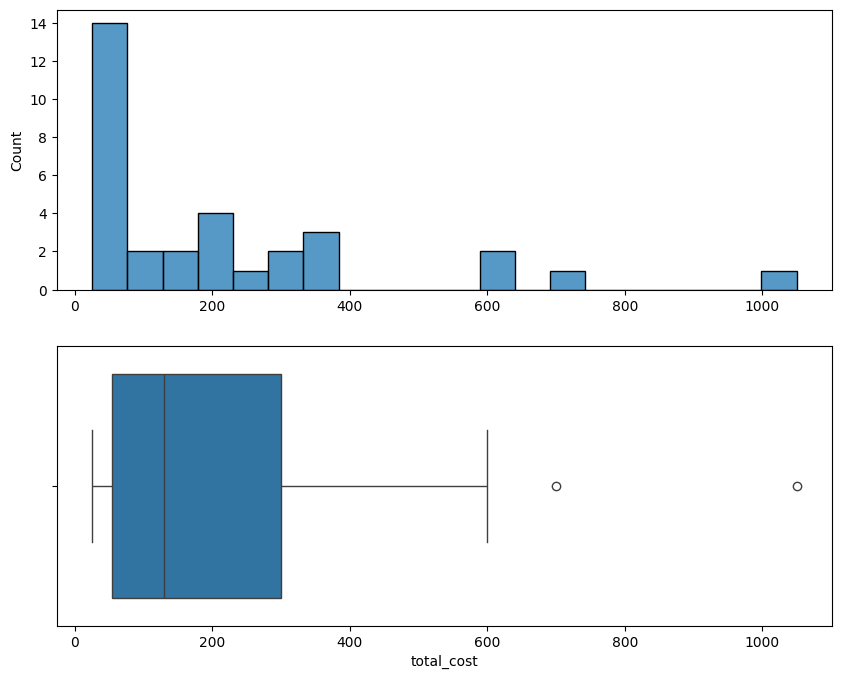

In [261]:
fig, axis = plt.subplots(2, 1, figsize=(10, 8))

# Histograma y boxplot para 'price'
sns.histplot(ax=axis[0], data=dataset, x="total_cost", bins=20).set(xlabel=None)
sns.boxplot(ax=axis[1], data=dataset, x="total_cost")

## Análisis Multivariante

- Análisis numérico-numérico

Se analizarán a pares las variables numéricas siempre con "units_sold" ya que es la variable que se trata de comprender en relación a las demás y el objetivo de este estudio.

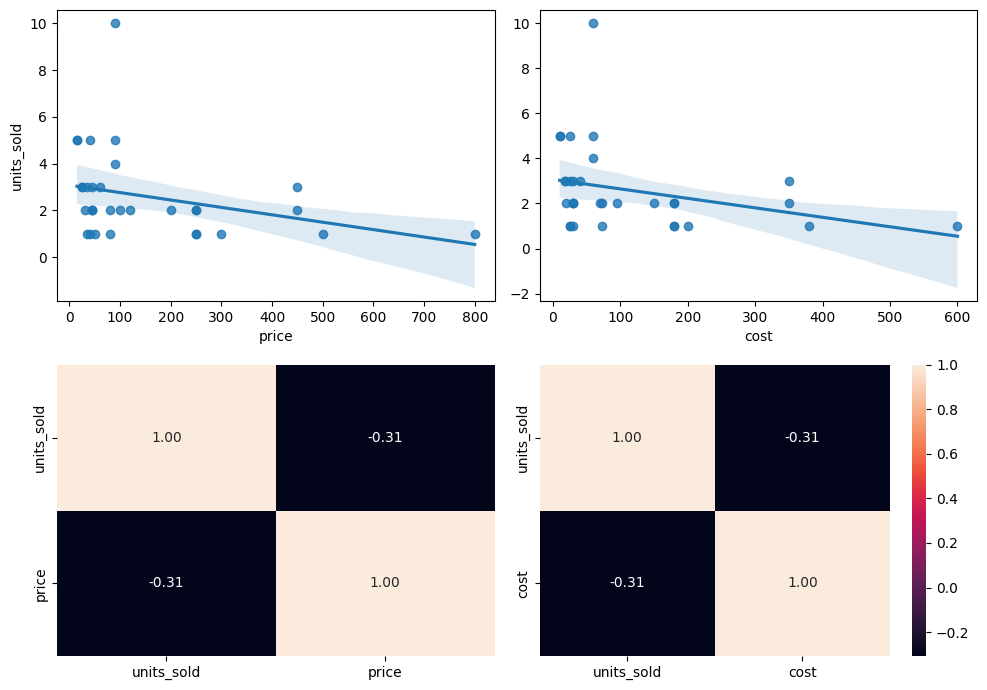

In [262]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dataset, x = "price", y = "units_sold")
sns.heatmap(dataset[["units_sold", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataset, x = "cost", y = "units_sold").set(ylabel=None)
sns.heatmap(dataset[["units_sold", "cost"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

# comentario

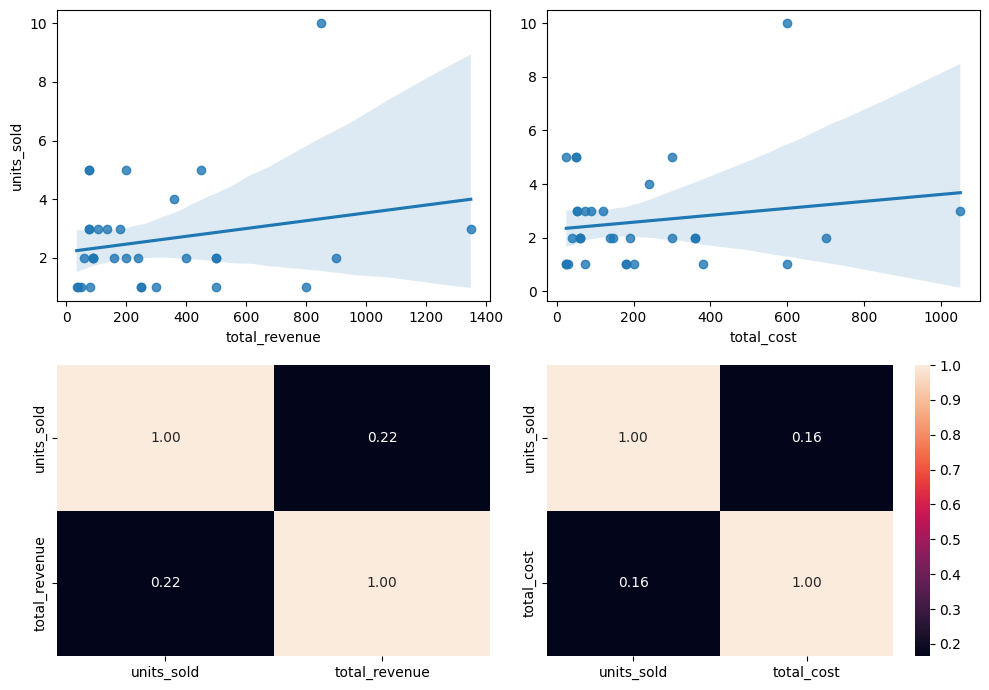

In [263]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = dataset, x = "total_revenue", y = "units_sold")
sns.heatmap(dataset[["units_sold", "total_revenue"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = dataset, x = "total_cost", y = "units_sold").set(ylabel=None)
sns.heatmap(dataset[["units_sold", "total_cost"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

# comentario

- Análisis categórico-categórico

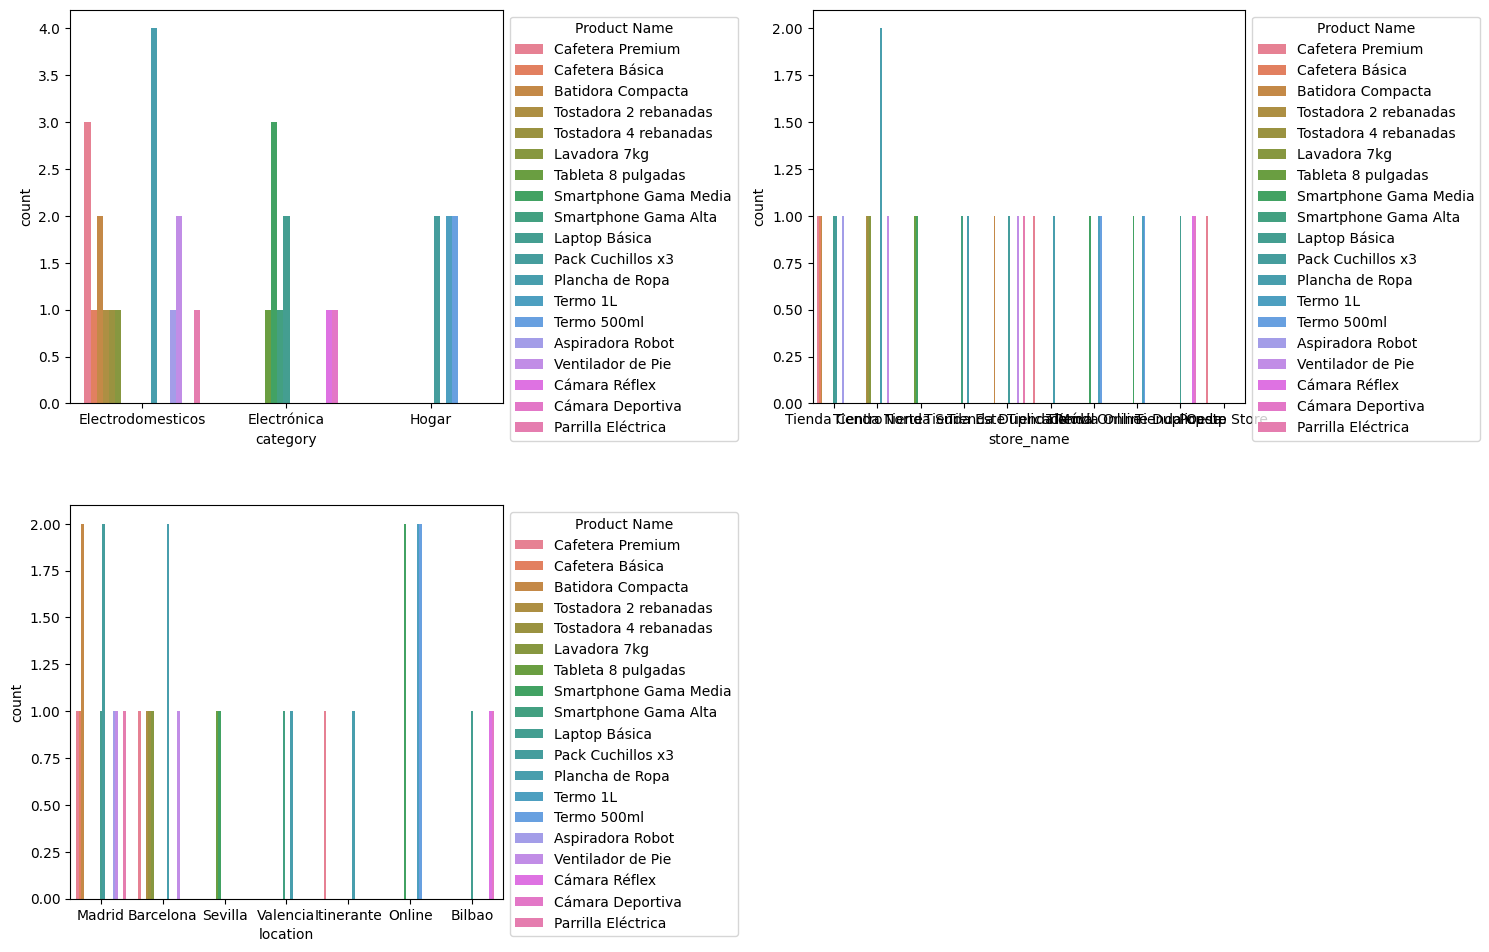

In [269]:
fig, axis = plt.subplots(2, 2, figsize = (15, 10))

sns.countplot(ax = axis[0, 0], data = dataset, x = "category", hue = "product_name")
axis[0, 0].legend(title="Product Name", bbox_to_anchor=(1, 1), loc='upper left')

sns.countplot(ax = axis[0, 1], data = dataset, x = "store_name", hue = "product_name")
axis[0, 1].legend(title="Product Name", bbox_to_anchor=(1, 1), loc='upper left')

sns.countplot(ax = axis[1, 0], data = dataset, x = "location", hue = "product_name")
axis[1, 0].legend(title="Product Name", bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
fig.delaxes(axis[1, 1])

plt.show()

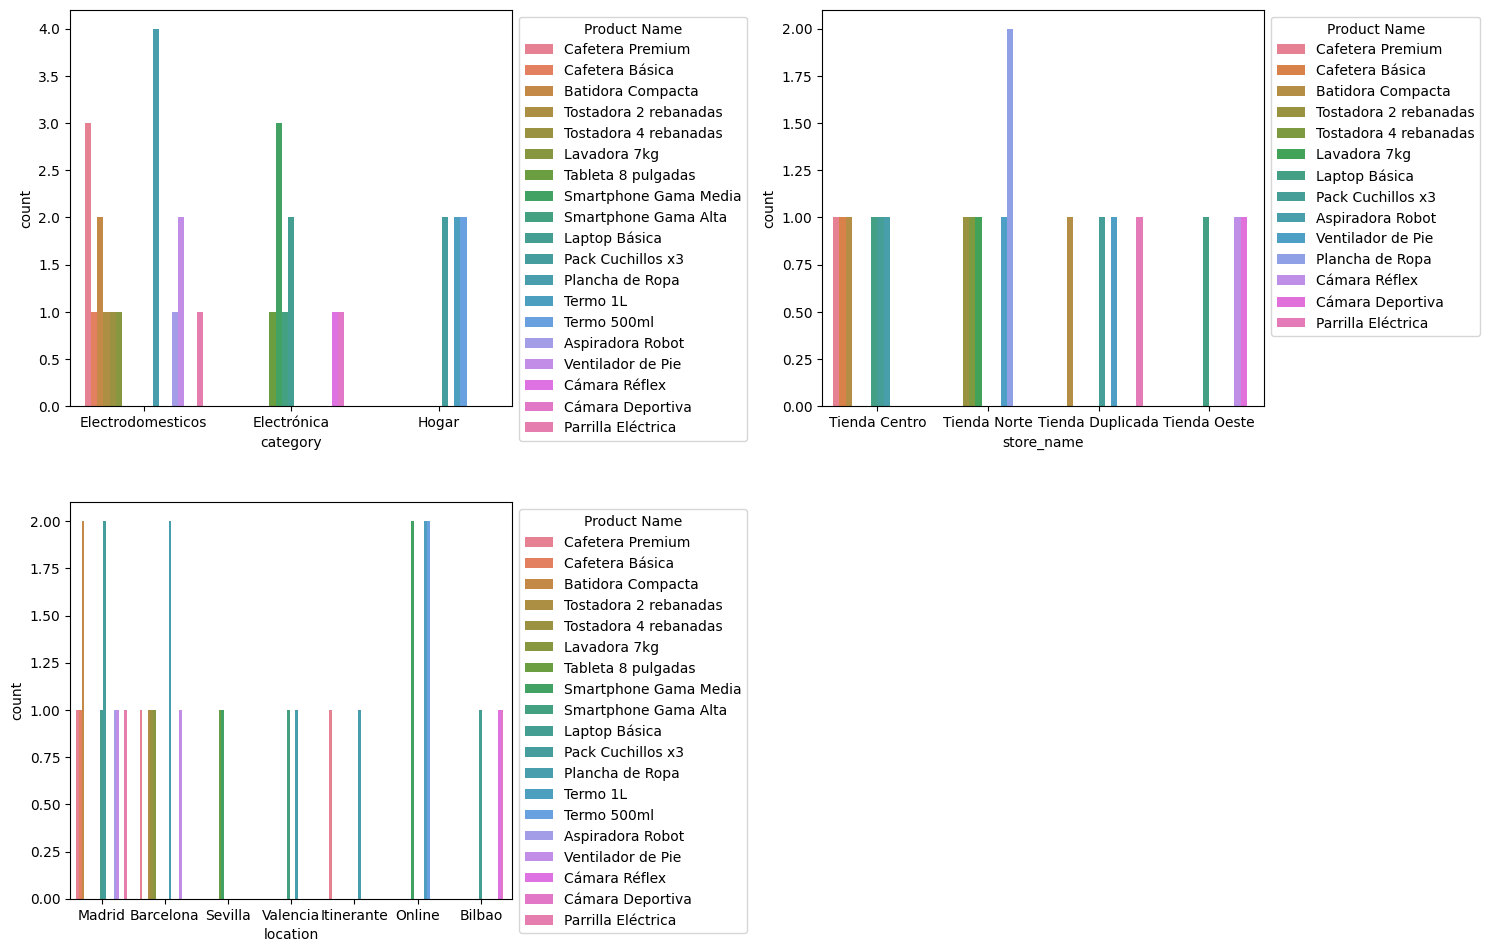

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las 10 tiendas más frecuentes
top_stores = dataset['store_name'].value_counts().nlargest(4).index

# Filtrar el dataset para incluir solo las 10 tiendas más frecuentes
filtered_dataset = dataset[dataset['store_name'].isin(top_stores)]

# Crear la figura y los ejes
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

# Primer gráfico: Categorías
sns.countplot(ax=axis[0, 0], data=dataset, x="category", hue="product_name")
axis[0, 0].legend(title="Product Name", bbox_to_anchor=(1, 1), loc='upper left')

# Segundo gráfico: Solo las 10 tiendas más frecuentes
sns.countplot(ax=axis[0, 1], data=filtered_dataset, x="store_name", hue="product_name")
axis[0, 1].legend(title="Product Name", bbox_to_anchor=(1, 1), loc='upper left')

# Tercer gráfico
sns.countplot(ax=axis[1, 0], data=dataset, x="location", hue="product_name")
axis[1, 0].legend(title="Product Name", bbox_to_anchor=(1, 1), loc='upper left')

# Ajustar el layout
plt.tight_layout()

# Eliminar el eje vacío
fig.delaxes(axis[1, 1])

# Mostrar la figura
plt.show()
